0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64
[[0.8678079  0.1321921 ]
 [0.20424783 0.79575217]
 [0.91514353 0.08485647]
 ...
 [0.3044128  0.6955872 ]
 [0.82582907 0.17417093]
 [0.03806059 0.96193941]]
accuracy : 0.7962529274004684
precision : 0.7948442534908701
recall : 0.9135802469135802
f1 score :0.8500861573808156
confusion matrix : [[280 191]
 [ 70 740]]
0.7540300385311002
      no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
1703                 5       5400000     19700000         20          423   
1173                 2       5900000     14000000          8          599   
308                  3       9600000     19900000         14          452   
1322                 2       6200000     23400000          8          605   
3271                 3       5800000     14100000         12          738   

      residential_assets_value  luxury_assets_

/var/folders/2t/qm1yw0fs74gbtb4m6jqsrblc0000gp/T/ipykernel_7744/685594634.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_prediction_details['loan_status'] = loan_prediction_details['loan_status'].replace({' Approved': 1, ' Rejected': 0})


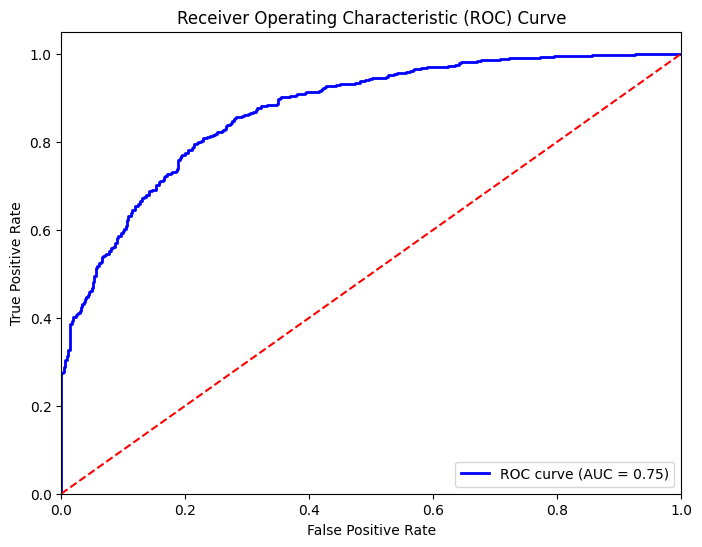

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
loan_prediction_details = pd.read_csv("/users/amulya/Downloads/loan_approval_dataset.csv")
loan_prediction_details.columns = loan_prediction_details.columns.str.strip()
# print(loan_prediction_details)
null_values = loan_prediction_details.isna().sum()
unwanted_columns = ['loan_id','education','self_employed','commercial_assets_value']
loan_prediction_details = loan_prediction_details.drop(unwanted_columns,axis = 1)
# print(null_values)
loan_prediction_details['loan_status'] = loan_prediction_details['loan_status'].replace({' Approved': 1, ' Rejected': 0})
print(loan_prediction_details['loan_status'])
# loan_prediction_details['education'] = loan_prediction_details['education'].replace({' Graduate': 1, ' Not Graduate': 0})
# loan_prediction_details['self_employed'] = loan_prediction_details['self_employed'].replace({' Yes': 1, ' No': 0})
# print(loan_prediction_details['loan_status'])
# plt.scatter(loan_prediction_details.cibil_score,loan_prediction_details.loan_status,marker = '*',color = 'red')
x = loan_prediction_details.drop(['loan_status'], axis= 1)
y = loan_prediction_details['loan_status'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter = 500)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
probability = model.predict_proba(x_test)
print(probability)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, probability[:, 1])
auc = roc_auc_score(y_test, y_pred)
print(f'accuracy : {accuracy}\nprecision : {precision}\nrecall : {recall}\nf1 score :{f1}\nconfusion matrix : {confusion_matrix}')
print(auc)
logistic_dataset = x_test.copy()
logistic_dataset['Actual loanStatus'] = y_test.values
logistic_dataset['Predicted loanStatus'] = y_pred
print(logistic_dataset.head())
# print(logistic_dataset.head(n=100).to_string(index=False))
fpr, tpr, thresholds = roc_curve(y_test, probability[:, 1])

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()